In [6]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import datetime
from datetime import timedelta
import pandas as pd

In [18]:
time_range = 1

# Get today's date
end_date = datetime.datetime.today()

# Calculate the start date (5 years earlier)
start_date = end_date - timedelta(days=time_range*365)

# Format dates as strings
end_date_str = end_date.strftime('%Y-%m-%d')
start_date_str = start_date.strftime('%Y-%m-%d')

# Define the ticker symbol
symbol = ["XRP-EUR"]

# Download the data
data = yf.download(symbol, start=start_date_str, end=end_date_str)

print(data)

[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close      Volume
Date                                                                     
2023-08-02  0.635187  0.642462  0.622419  0.642462   0.642462  1306405555
2023-08-03  0.642350  0.642350  0.621182  0.626127   0.626127  1034722656
2023-08-04  0.626114  0.627719  0.603469  0.606458   0.606458  1291727626
2023-08-05  0.606415  0.608076  0.571656  0.576404   0.576404  1217191668
2023-08-06  0.576398  0.576398  0.555633  0.569951   0.569951  1035871099
...              ...       ...       ...       ...        ...         ...
2024-07-27  0.552745  0.560351  0.541185  0.555592   0.555592  1274632431
2024-07-28  0.555593  0.560062  0.539671  0.548954   0.548954   927189396
2024-07-29  0.548954  0.563782  0.544688  0.554664   0.554664   844075163
2024-07-30  0.554662  0.564111  0.548359  0.556490   0.556490  1089188846
2024-07-31  0.556488  0.586088  0.551183  0.580527   0.580527  2031782967

[365 rows x 6 columns]


In [19]:
# Calculate the volume change
volume = data["Volume"]
volume_change = volume.pct_change()

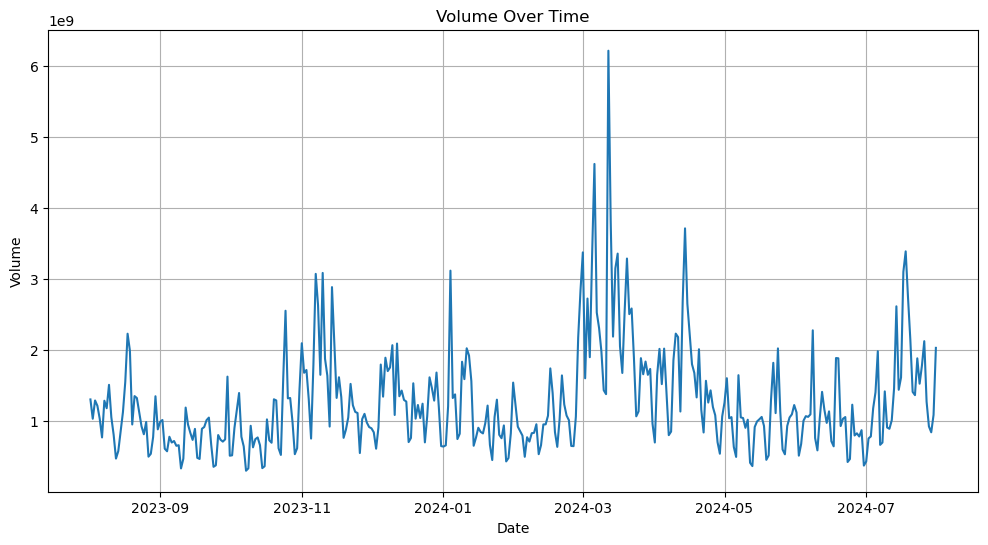

In [20]:
# Plot the volume change
plt.figure(figsize=(12, 6))
plt.plot(volume)



plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

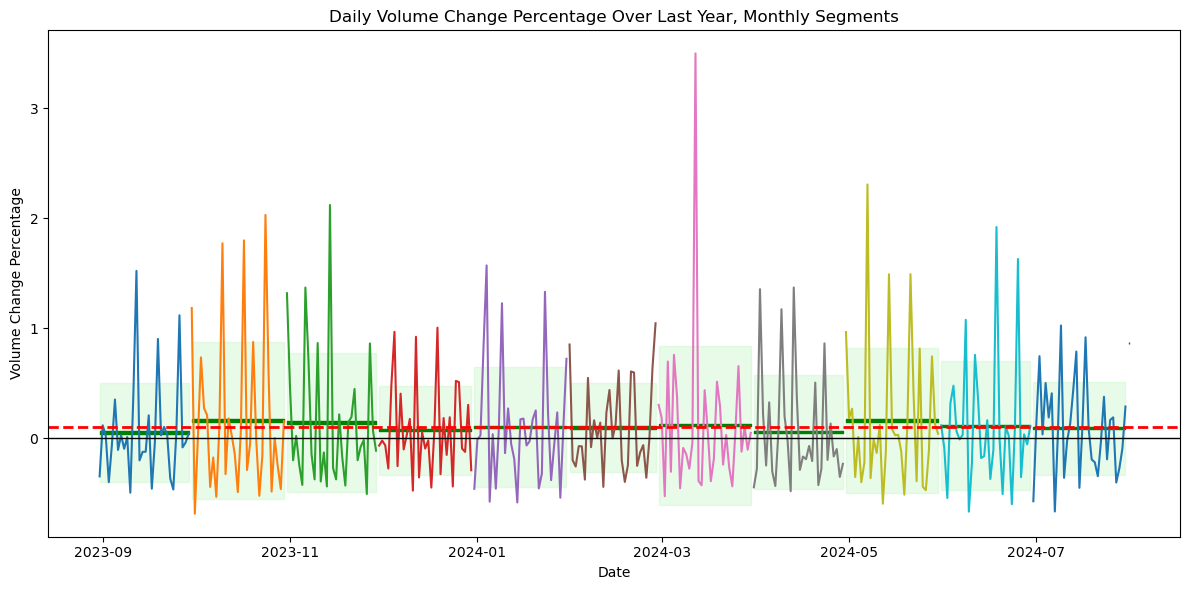

In [21]:
# Resample to monthly frequency for plotting the last year's data
volume_change_last_year = volume_change.loc[end_date - timedelta(days=365):]

# Calculate average volume change over the last year
average_volume_change = volume_change_last_year.mean()

# Plotting all months on a single plot
plt.figure(figsize=(12, 6))

# Iterate through each month
for i in range(len(volume_change_last_year.resample('M'))):
    # Subset data for the current month
    start_month = volume_change_last_year.resample('M').mean().index[i]
    if i == len(volume_change_last_year.resample('M')) - 1:
        end_month = end_date
    else:
        end_month = volume_change_last_year.resample('M').mean().index[i + 1] - timedelta(days=1)
    
    volume_change_month = volume_change_last_year.loc[start_month:end_month]

    # Mean and standard deviation for the current month
    mean_volume_change = volume_change_month.mean()
    std_volume_change = volume_change_month.std()
    
    # Upper and lower borders
    upper_border = mean_volume_change + std_volume_change
    lower_border = mean_volume_change - std_volume_change
    
    # Plot volume change for the current month
    plt.plot(volume_change_month.index, volume_change_month, label=start_month.strftime('%b %Y'))
    
    # Fill area between mean ± std dev for the current month
    plt.fill_between(volume_change_month.index, lower_border, upper_border, alpha=0.2, color='lightgreen')

    # Highlight mean line with a stronger color
    plt.fill_between(volume_change_month.index, mean_volume_change - 0.01, mean_volume_change + 0.01, alpha=1, color='green')
    
plt.axhline(y=average_volume_change, color='red', linestyle='--', linewidth=2, label=f'Average: {average_volume_change:.4f}')

# Plot the zero line
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

# Title and labels
plt.title('Daily Volume Change Percentage Over Last Year, Monthly Segments')
plt.xlabel('Date')
plt.ylabel('Volume Change Percentage')
plt.grid(False)
plt.tight_layout()
plt.show()

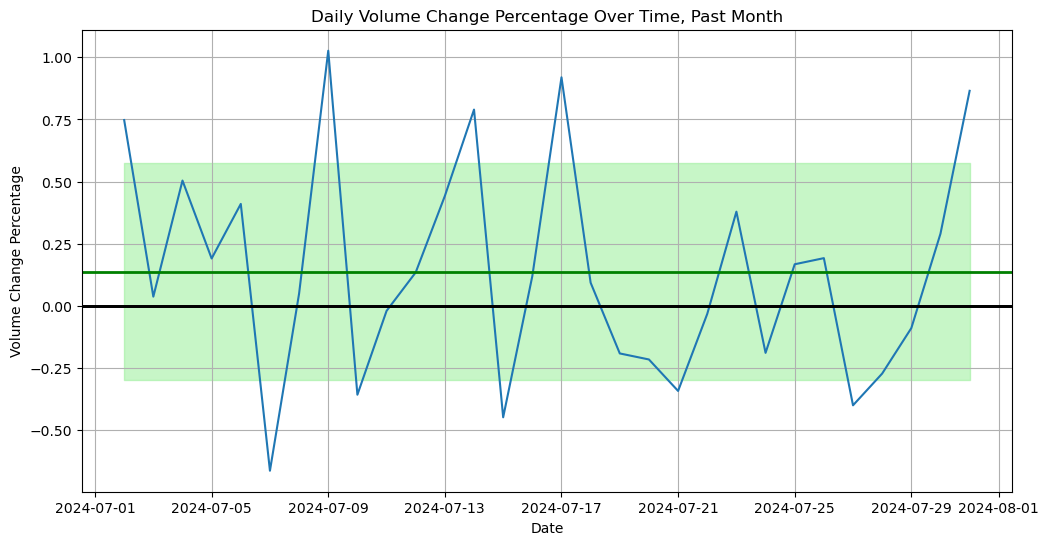

Today the volume is up: 86.53999999999999 %, from yesterday


In [16]:

# Plot the volume change of past month
volume_change_month = volume_change.iloc[-30:]

plt.figure(figsize=(12, 6))
plt.plot(volume_change_month)

hline_value = 0  # x-axis
plt.axhline(y=hline_value, color='black', linestyle='-', linewidth=2)

# Mean and standard deviation
mean_volume_change = volume_change_month.mean()
std_volume_change = volume_change_month.std()

# Upper and lower borders
upper_border = mean_volume_change + std_volume_change
lower_border = mean_volume_change - std_volume_change

# Plot the mean line
plt.axhline(y=mean_volume_change, color='green', linestyle='-', linewidth=2, label='Mean')

# Plot the zero line
plt.axhline(y=0, color='black', linestyle='-', linewidth=2, label='Zero')

# Fill the area between mean ± std dev
plt.fill_between(volume_change_month.index, lower_border, upper_border, color='lightgreen', alpha=0.5, label='Mean ± 1 Std Dev')

plt.title('Daily Volume Change Percentage Over Time, Past Month')
plt.xlabel('Date')
plt.ylabel('Volume Change Percentage')
plt.grid(True)
plt.show()

print("Today the volume is up:",round(volume_change.iloc[-1],4)*100,"%, from yesterday")